# Herron - Do market prices respond to new information?

This notebook uses [Elon Musk's proposed acquisition of Twitter (TWTR)](https://en.wikipedia.org/wiki/Proposed_acquisition_of_Twitter_by_Elon_Musk) to show that market prices respond to information.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['figure.dpi'] = 150
%precision 4
pd.options.display.float_format = '{:.4f}'.format

In [3]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession()

## Dates and Data

In [4]:
dates = {
    'First Purchase': pd.to_datetime('2022-01-31'),
    'Purchases Announced': pd.to_datetime('2022-04-04'),
    'Bid Announced': pd.to_datetime('2022-04-14'),
    'Bid on Hold': pd.to_datetime('2022-05-13'),
    'Bid Revived': pd.to_datetime('2022-10-04')
}

In [5]:
twtr_all = yf.download(tickers='TWTR', session=session)

[*********************100%***********************]  1 of 1 completed


In [6]:
price_bid = 54.20

## Implied Probability of Deal Completion

Twitter's stock price is the present value of expected cash flows.
If the deal closes, the expected cash flow is the bid price.
Otherwise, the expected cash flow is the unaffected price.
So, $$P_t = p\times P_{bid} + (1-p)\times P_{unaffected},$$ where $p$ is the probability of deal completion.
We can rearrange this formula to estimate an implied probability of deal completion as $$p = \frac{P_t - P_{unaffected}}{P_{bid} - P_{unaffected}}.$$

In [7]:
twtr_all['Price'] = twtr_all['Close']

In [8]:
price_unaffected = twtr_all.loc[dates['Purchases Announced'] - pd.offsets.BDay(20), 'Price']

In [9]:
twtr_all['Probability'] = (twtr_all['Price'] - price_unaffected) / (price_bid - price_unaffected)

In [10]:
twtr_all.loc[:dates['Bid Announced'] - pd.offsets.BDay(1), 'Probability'] = np.nan

In [11]:
twtr = twtr_all.loc[dates['First Purchase']:,  ['Price', 'Probability']]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

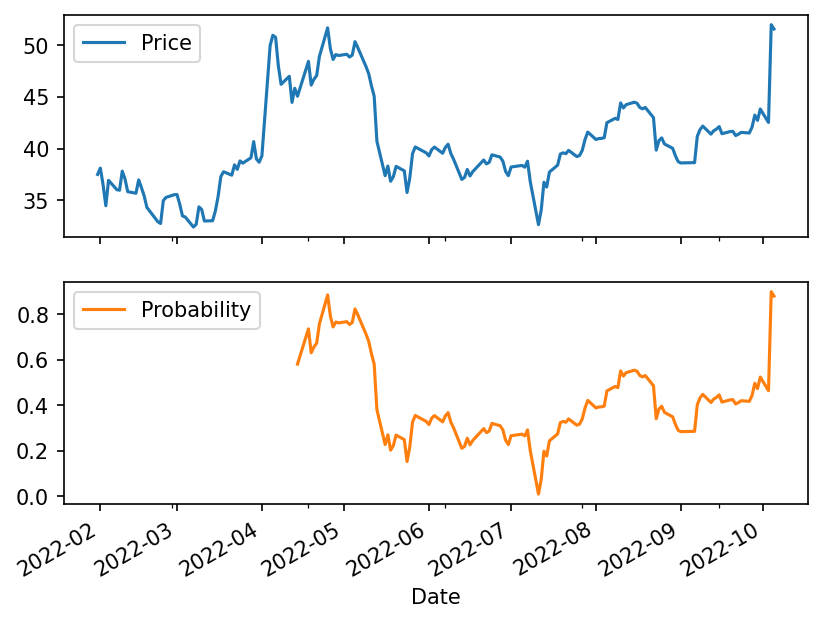

In [12]:
twtr.plot(subplots=True)

In [13]:
twtr

,Price,Probability
Date,,
2022-01-31,37.5100,NaN
2022-02-01,38.1200,NaN
2022-02-02,36.5100,NaN
2022-02-03,34.4800,NaN
2022-02-04,36.9400,NaN
...,...,...
2022-09-29,42.7400,0.4738
2022-09-30,43.8400,0.5243
2022-10-03,42.5400,0.4646


Why does probability never get to 100%?

1. Deal is still not certain to close/complete
1. Our $P_{bid}$ will not be the final price
1. Our $P_{unaffected}$ is not where the price will go if deal does not close

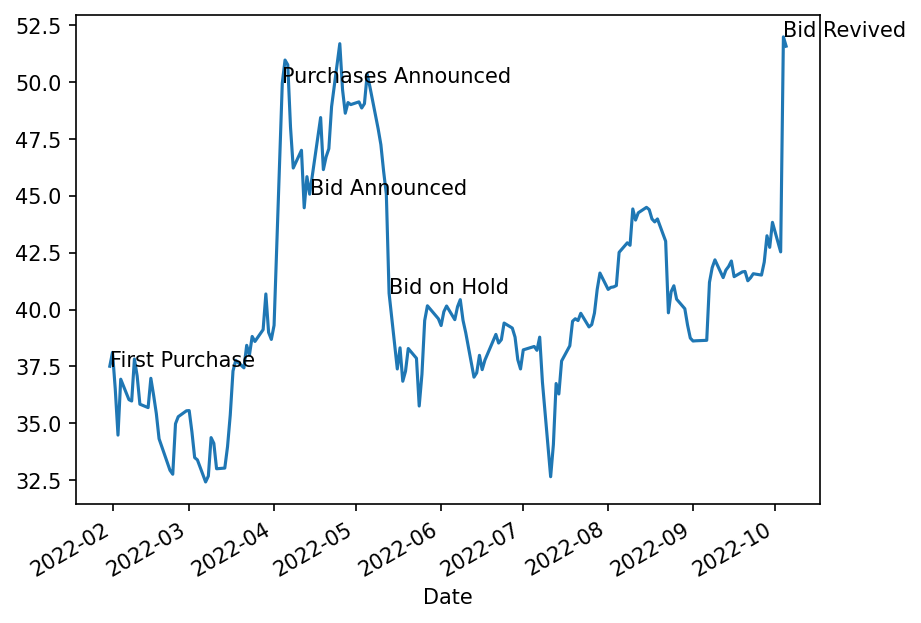

In [24]:
twtr['Price'].plot()
for label, date in dates.items():
    plt.annotate(text=label, xy=(date, twtr.loc[date, 'Price']))